# Sensitivity Analysis using SuPy

## Aim

In this tutorial, we aim to perform sensitivity analysis using `supy` to investigate the impacts on urban climate of 

1. surface properties: the physical attributes of land covers (e.g., albedo, water holding capacity, etc.)
2. background climate: longterm meteorological conditions (e.g., air temperature, precipitation, etc.)



## load `supy` and sample dataset

In [3]:
import supy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
ser_cfg, df_state_init, df_met_forcing = sp.load_SampleData()

## surface properties

### surface albedo

In [6]:
df_state_init.filter(like='alb').T

grid                         1
var            ind_dim        
alb            (0,)       0.12
               (1,)       0.15
               (2,)       0.12
               (3,)       0.18
               (4,)       0.21
               (5,)       0.21
               (6,)       0.10
albmax_dectr   0          0.18
albmax_evetr   0          0.12
albmax_grass   0          0.21
albmin_dectr   0          0.12
albmin_evetr   0          0.11
albmin_grass   0          0.18
preciplimitalb 0          2.00
snowalbmax     0          0.80
snowalbmin     0          0.18
albevetr0      0          0.10
albdectr0      0          0.12
albgrass0      0          0.18
snowalb0       0       -999.00
snowalb        0       -999.00
albdectr_id    0          0.12
albevetr_id    0          0.10
albgrass_id    0          0.18

In [7]:
df_state_init_test=df_state_init.copy()

In [15]:
df_state_init_test.loc[:,('alb','(1,)')]

grid
1    0.15
Name: (alb, (1,)), dtype: float64

In [22]:
df_state_init_test.sfr=1/7
df_state_init_test.sfr

ind_dim,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)","(6,)"
grid,,,,,,,
1,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [33]:
df_state_init_test.sfr.values

array([[0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714]])

In [34]:
def test_alb(alb_test):
    df_state_init_test = df_state_init.copy()
    df_state_init_test.sfr = np.array([0, 1, 0, 0, 0, 0, 0]).reshape((1,-1))
    df_state_init_test.loc[:, ('alb', '(1,)')] = alb_test
    df_forcing_part = df_met_forcing.loc['2012 07']
    df_output, df_state_end = sp.run_suews_df(
        df_forcing_part,
        df_state_init_test)
    return df_output

In [64]:
list_alb_test=np.linspace(0.1,0.8,15).round(2)

In [66]:
res_alb_test={alb_test:test_alb(alb_test) for alb_test in list_alb_test}

In [67]:
df_res_test=pd.concat({alb:res_alb_test[alb].loc[1,'SUEWS'] for alb in list_alb_test},names=['albedo']).unstack(0)

In [71]:
df_res_test.loc[:,'T2'].T

datetime,2012-07-01 00:00:00,2012-07-01 00:05:00,2012-07-01 00:10:00,2012-07-01 00:15:00,2012-07-01 00:20:00,2012-07-01 00:25:00,2012-07-01 00:30:00,2012-07-01 00:35:00,2012-07-01 00:40:00,2012-07-01 00:45:00,...,2012-07-31 23:10:00,2012-07-31 23:15:00,2012-07-31 23:20:00,2012-07-31 23:25:00,2012-07-31 23:30:00,2012-07-31 23:35:00,2012-07-31 23:40:00,2012-07-31 23:45:00,2012-07-31 23:50:00,2012-07-31 23:55:00
albedo,,,,,,,,,,,,,,,,,,,,,
0.10,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.072739,16.041081,16.009421,15.977759,15.946096,15.919923,15.899241,15.878558,15.857874,15.837189
0.15,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.071634,16.039990,16.008343,15.976695,15.945044,15.918882,15.898208,15.877532,15.856856,15.836178
0.20,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.070482,16.038851,16.007218,15.975583,15.943946,15.917795,15.897129,15.876461,15.855793,15.835122
0.25,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.069243,16.037627,16.006009,15.974388,15.942766,15.916626,15.895969,15.875310,15.854650,15.833988
0.30,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.067994,16.036393,16.004790,15.973185,15.941577,15.915449,15.894801,15.874151,15.853499,15.832846
0.35,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.066700,16.035115,16.003527,15.971937,15.940344,15.914228,15.893589,15.872948,15.852306,15.831661
0.40,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.065414,16.033843,16.002270,15.970695,15.939118,15.913014,15.892384,15.871753,15.851119,15.830484
0.45,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.064038,16.032484,16.000927,15.969368,15.937807,15.911716,15.891096,15.870474,15.849850,15.829224
0.50,13.590688,13.589283,13.587878,13.586472,13.585066,13.583659,13.582252,13.561578,13.521641,13.481711,...,16.062666,16.031128,15.999587,15.968044,15.936499,15.910421,15.889811,15.869199,15.848585,15.827968


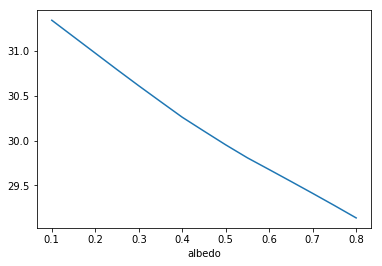

In [68]:
df_res_test.T2.describe().loc['max'].rename('T2max').plot()

### water holding capacity

## background climate

### air temperature

### precipitation